In [7]:
# Imports
import numpy as np 
import pandas as pd 
import seaborn
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [8]:
path = "apple_quality.csv"
df = pd.read_csv(path)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [9]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [10]:
df = df.dropna()

# Converting Acidity dtype object -> float
df["Acidity"] = df["Acidity"].astype("float64")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [12]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


array([[<Axes: title={'center': 'A_id'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Sweetness'}>,
        <Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>],
       [<Axes: title={'center': 'Ripeness'}>,
        <Axes: title={'center': 'Acidity'}>, <Axes: >]], dtype=object)

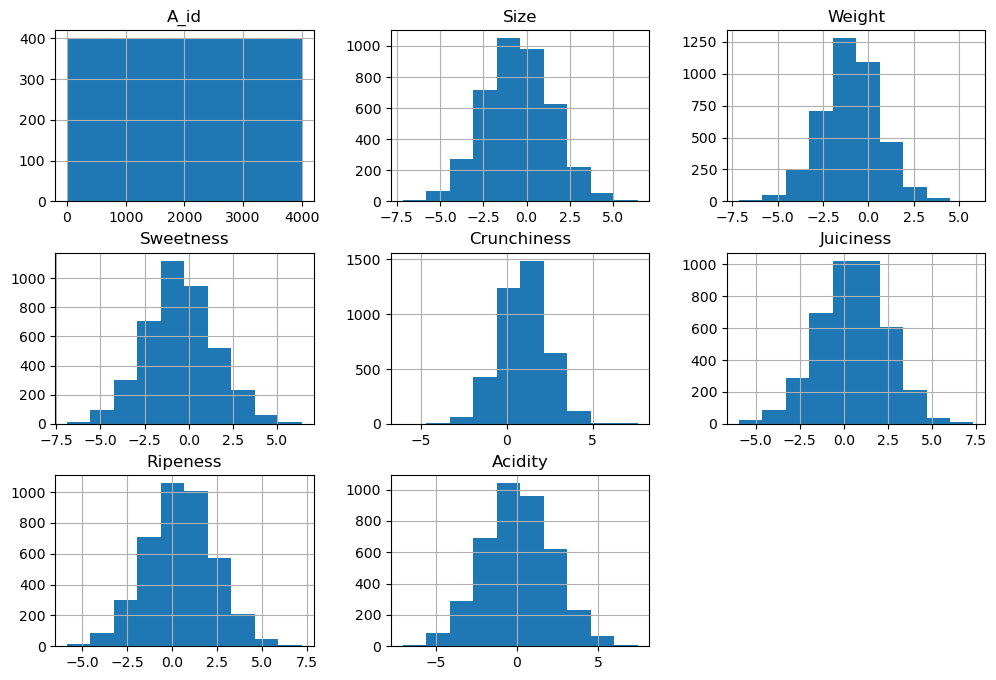

In [13]:
df.hist(figsize=(12,8))

<Axes: xlabel='Quality', ylabel='count'>

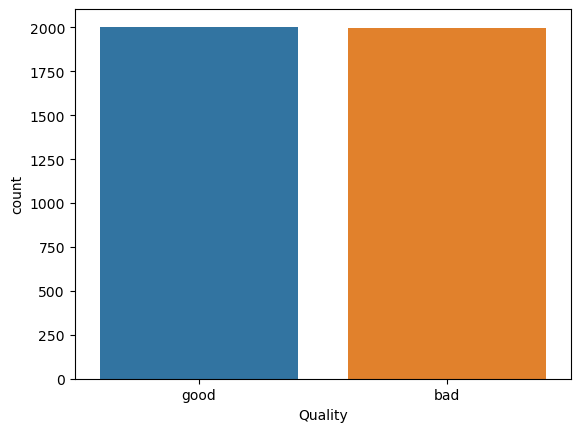

In [14]:
seaborn.countplot(data=df, x="Quality",)

In [15]:
shadow = df.copy()
shadow = shadow.drop(['A_id'], axis=1)

<Axes: >

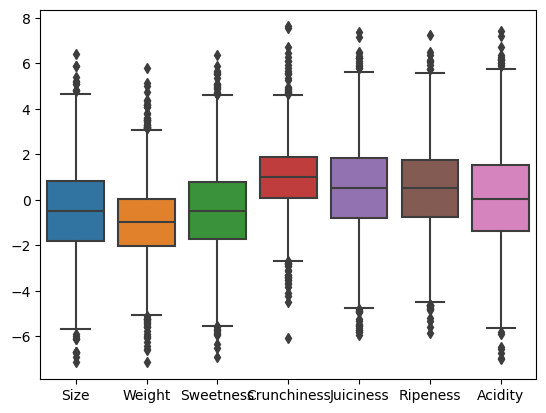

In [16]:
seaborn.boxplot(data=shadow)

In [17]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [18]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [19]:
shadow = shadow.drop(['Quality'], axis = 1)
corr_matrix = shadow.corr()

<Axes: >

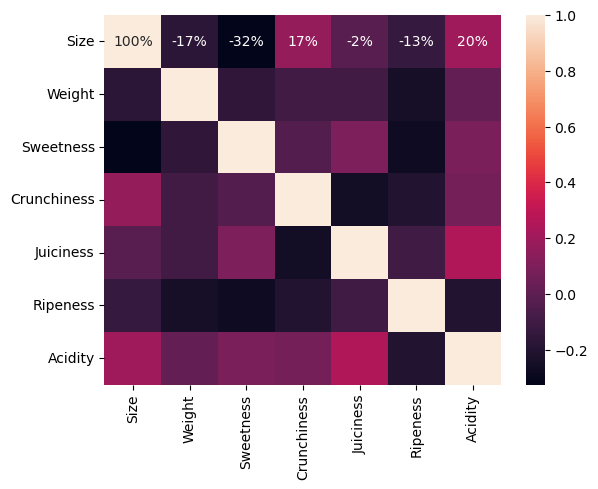

In [20]:
# Heatmap
seaborn.heatmap(corr_matrix, annot = True, fmt=".0%")

<Axes: >

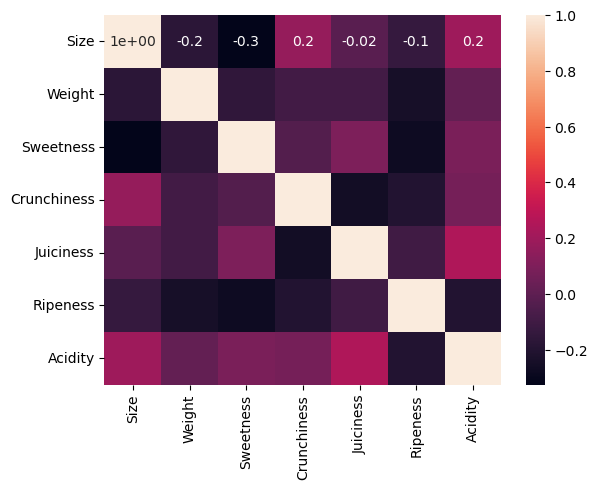

In [21]:
seaborn.heatmap(corr_matrix, annot = True, fmt=".000")

In [23]:
features = df.drop(['A_id','Quality'], axis=1)
label = df['Quality']

In [24]:
ftrain, ftest, ltrain, ltest = train_test_split(features, label, test_size=0.2, random_state=0)

In [25]:
# Models
LR = LogisticRegression()
CT = DecisionTreeClassifier()

In [26]:
# Training 
LR.fit(ftrain, ltrain)
CT.fit(ftrain, ltrain)

DecisionTreeClassifier()

In [27]:
# Predictions
lrpred = LR.predict(ftest)
ctpred = CT.predict(ftest)

In [28]:
# Evaluation
print(f"Model - LR, Accuracy - {accuracy_score(ltest, lrpred)}")
print(f"Model - CT, Accuracy - {accuracy_score(ltest, ctpred)}")

Model - LR, Accuracy - 0.7525
Model - CT, Accuracy - 0.7725


In [29]:
# Classification Matrix
print(f"LR\n{'=' * 65}")
print(f"{classification_report(ltest, lrpred)}")
print(f"CT\n{'=' * 65}")
print(f"{classification_report(ltest, ctpred)}")

LR
              precision    recall  f1-score   support

         bad       0.78      0.73      0.76       422
        good       0.72      0.77      0.75       378

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

CT
              precision    recall  f1-score   support

         bad       0.79      0.78      0.78       422
        good       0.76      0.76      0.76       378

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800

